In [39]:
print("Hello World!")

Hello World!


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [41]:
historical_data_punjab=pd.read_csv("C:\Desktop\Smart Irrigation System\Punjab_India\PUNJAB_2_open-meteo-31.39N75.93E285m.csv")


In [42]:
historical_data_punjab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                35064 non-null  object 
 1   temperature_2m (°C)                 35064 non-null  float64
 2   relative_humidity_2m (%)            35064 non-null  int64  
 3   precipitation (mm)                  35064 non-null  float64
 4   et0_fao_evapotranspiration (mm)     35064 non-null  float64
 5   wind_speed_10m (km/h)               35064 non-null  float64
 6   soil_temperature_28_to_100cm (°C)   35064 non-null  float64
 7   soil_moisture_28_to_100cm (m³/m³)   35064 non-null  float64
 8   shortwave_radiation_instant (W/m²)  35064 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.4+ MB


In [43]:

# Convert timestamp to datetime
historical_data_punjab['timestamp'] = pd.to_datetime(historical_data_punjab['time'])

# Extract date
historical_data_punjab['date'] = historical_data_punjab['timestamp'].dt.date

# Aggregate to daily data
historical_data_punjab_daily = historical_data_punjab.groupby('date').agg({
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'precipitation (mm)': 'sum',
    'et0_fao_evapotranspiration (mm)': 'sum',
    'wind_speed_10m (km/h)': 'mean',
    'soil_temperature_28_to_100cm (°C)': 'mean',
    'soil_moisture_28_to_100cm (m³/m³)': 'mean',
    'shortwave_radiation_instant (W/m²)': 'sum'
}).reset_index()


In [75]:
future_data_punjab = pd.read_csv(r"C:\Desktop\Smart Irrigation System\future_data_current_open-meteo-31.39N75.93E285m.csv")
## from peroid 2024 Jan 1 to 2024 Jun 26

In [77]:
future_data_punjab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                4368 non-null   object 
 1   temperature_2m (°C)                 4368 non-null   float64
 2   relative_humidity_2m (%)            4368 non-null   int64  
 3   precipitation (mm)                  4368 non-null   float64
 4   et0_fao_evapotranspiration (mm)     4368 non-null   float64
 5   wind_speed_10m (km/h)               4368 non-null   float64
 6   soil_temperature_28_to_100cm (°C)   4368 non-null   float64
 7   soil_moisture_28_to_100cm (m³/m³)   4368 non-null   float64
 8   shortwave_radiation_instant (W/m²)  4368 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 307.3+ KB


In [78]:

# Convert timestamp to datetime
future_data_punjab['timestamp'] = pd.to_datetime(future_data_punjab['time'])

# Extract date
future_data_punjab['date'] = future_data_punjab['timestamp'].dt.date

# Aggregate to daily data
future_data_punjab_daily = future_data_punjab.groupby('date').agg({
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'precipitation (mm)': 'sum',
    'et0_fao_evapotranspiration (mm)': 'sum',
    'wind_speed_10m (km/h)': 'mean',
    'soil_temperature_28_to_100cm (°C)': 'mean',
    'soil_moisture_28_to_100cm (m³/m³)': 'mean',
    'shortwave_radiation_instant (W/m²)': 'sum'
}).reset_index()


In [79]:
future_data_punjab_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                182 non-null    object 
 1   temperature_2m (°C)                 182 non-null    float64
 2   relative_humidity_2m (%)            182 non-null    float64
 3   precipitation (mm)                  182 non-null    float64
 4   et0_fao_evapotranspiration (mm)     182 non-null    float64
 5   wind_speed_10m (km/h)               182 non-null    float64
 6   soil_temperature_28_to_100cm (°C)   182 non-null    float64
 7   soil_moisture_28_to_100cm (m³/m³)   182 non-null    float64
 8   shortwave_radiation_instant (W/m²)  182 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.9+ KB


In [80]:
# Concatenate the DataFrames
combined_historical_data_punjab_daily = pd.concat([historical_data_punjab_daily, future_data_punjab_daily], ignore_index=True)


In [81]:
combined_historical_data_punjab_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1643 non-null   object 
 1   temperature_2m (°C)                 1643 non-null   float64
 2   relative_humidity_2m (%)            1643 non-null   float64
 3   precipitation (mm)                  1643 non-null   float64
 4   et0_fao_evapotranspiration (mm)     1643 non-null   float64
 5   wind_speed_10m (km/h)               1643 non-null   float64
 6   soil_temperature_28_to_100cm (°C)   1643 non-null   float64
 7   soil_moisture_28_to_100cm (m³/m³)   1643 non-null   float64
 8   shortwave_radiation_instant (W/m²)  1643 non-null   float64
dtypes: float64(8), object(1)
memory usage: 115.7+ KB


In [82]:
# Rename ET₀ column for easier reference
combined_historical_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)

In [83]:
 #Set the date column as the index
combined_historical_data_punjab_daily.set_index('date', inplace=True)
# Ensure the index is in datetime format
combined_historical_data_punjab_daily.index = pd.to_datetime(combined_historical_data_punjab_daily.index)



## Examine Historical Soil Moisture Data


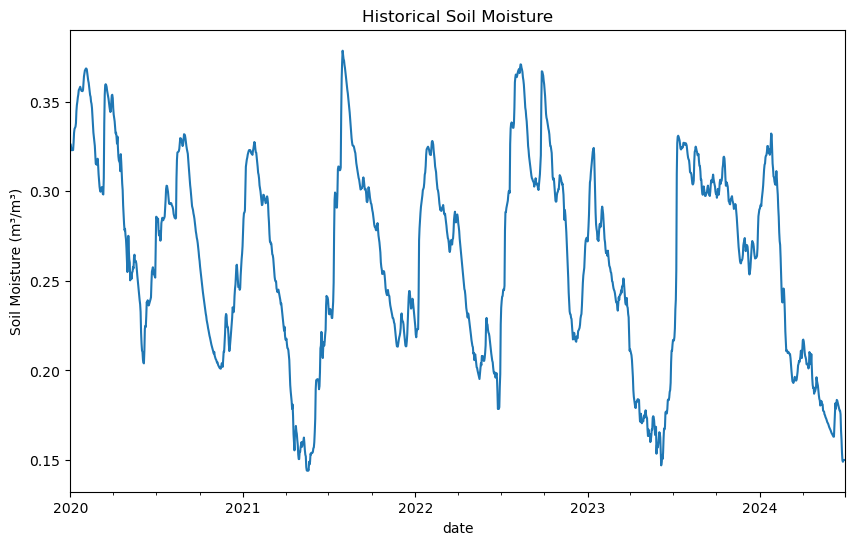

count    1643.000000
mean        0.262726
std         0.056177
min         0.144000
25%         0.217208
50%         0.268958
75%         0.306354
max         0.378458
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

In [84]:
# Plot historical soil moisture data
combined_historical_data_punjab_daily['soil_moisture_28_to_100cm (m³/m³)'].plot(figsize=(10, 6), title='Historical Soil Moisture')
plt.ylabel('Soil Moisture (m³/m³)')
plt.show()

# Describe the soil moisture data
combined_historical_data_punjab_daily['soil_moisture_28_to_100cm (m³/m³)'].describe()



In [85]:

# Drop any rows with missing values
combined_historical_data_punjab_daily.dropna(inplace=True)


In [86]:
combined_historical_data_punjab_daily_save=combined_historical_data_punjab_daily.copy()

In [87]:
 
combined_historical_data_punjab_daily.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'precipitation (mm)',
       'ET₀ (mm)', 'wind_speed_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)',
       'shortwave_radiation_instant (W/m²)'],
      dtype='object')

## Check Stationarity and Differencing


In [88]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary, differencing needed")

# Check for each column in the dataset
for column in combined_historical_data_punjab_daily.columns:
    print(f'Checking stationarity for {column}')
    check_stationarity(combined_historical_data_punjab_daily[column])

# Apply differencing if needed
combined_historical_data_punjab_daily_diff = combined_historical_data_punjab_daily.diff().dropna()

# Re-check stationarity after differencing
for column in combined_historical_data_punjab_daily_diff.columns:
    print(f'Checking stationarity for differenced {column}')
    check_stationarity(combined_historical_data_punjab_daily_diff[column])



Checking stationarity for temperature_2m (°C)
ADF Statistic: -2.4001253016899735
p-value: 0.14170104633465275
The series is not stationary, differencing needed
Checking stationarity for relative_humidity_2m (%)
ADF Statistic: -4.316594709658715
p-value: 0.0004157199128765317
The series is stationary
Checking stationarity for precipitation (mm)
ADF Statistic: -19.377949801585856
p-value: 0.0
The series is stationary
Checking stationarity for ET₀ (mm)
ADF Statistic: -2.7492376054729846
p-value: 0.06589861695373285
The series is not stationary, differencing needed
Checking stationarity for wind_speed_10m (km/h)
ADF Statistic: -4.546428186065186
p-value: 0.0001619519168739187
The series is stationary
Checking stationarity for soil_temperature_28_to_100cm (°C)
ADF Statistic: -4.411767285588888
p-value: 0.0002829179688439604
The series is stationary
Checking stationarity for soil_moisture_28_to_100cm (m³/m³)
ADF Statistic: -4.214721012550078
p-value: 0.000622096969474663
The series is statio

## Fitting Vector Autoregresion (VAR) Time series Model


In [89]:
""""Using this because it take multiple variables simultaneously"""

'"Using this because it take multiple variables simultaneously'

In [90]:
## Fit the VAR model to the differenced data.
# Fit the VAR model
model = VAR(combined_historical_data_punjab_daily_diff)
model_fit = model.fit(maxlags=15, ic='aic')

# Summary of the model
model_fit.summary()


c:\Users\godwi\Downloads\Anconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Jul, 2024
Time:                     14:23:14
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    1.18336
Nobs:                     1635.00    HQIC:                  0.236056
Log likelihood:          -17840.1    FPE:                   0.724484
AIC:                    -0.322522    Det(Omega_mle):        0.550767
--------------------------------------------------------------------
Results for equation temperature_2m (°C)
                                           coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------
const                                         0.018713         0.028906            0.647           0.517
L1.temperature_2m (°C)                        0.087044 

##  Forecast Future Values

In [103]:

# Forecast the next 14 days
forecast_steps = 14
lag_order = model_fit.k_ar
forecast_diff = model_fit.forecast(y=combined_historical_data_punjab_daily_diff.values[-lag_order:], steps=forecast_steps)

# Create a DataFrame for the forecasted differenced values
forecast_dates = pd.date_range(start=combined_historical_data_punjab_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecasted_diff_df = pd.DataFrame(data=forecast_diff, index=forecast_dates, columns=combined_historical_data_punjab_daily_diff.columns)

# Reverse the differencing to get the actual forecasted values
# Get the last value from the original data
last_values = combined_historical_data_punjab_daily.iloc[-1]

# Initialize the DataFrame for the actual forecasted values
forecasted_values_df = forecasted_diff_df.cumsum() + last_values



In [104]:

# Number of lags included in the model
number_of_lags = model_fit.k_ar
print(f"The model includes {number_of_lags} lags.")


The model includes 7 lags.


## Time Series Model Evaluation 

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
# Evaluate the forecasted values against the test set
test = combined_historical_data_punjab_daily[-forecast_steps:]  # Take the last 16 days from your actual data for evaluation

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecasted_values_df)
mse = mean_squared_error(test, forecasted_values_df)
rmse = np.sqrt(mse)

# Calculate means
mean_actual = test.mean()
mean_forecasted = forecasted_values_df.mean()

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'Mean Actual: \n{mean_actual}')
print(f'Mean Forecasted: \n{mean_forecasted}')

# Compare RMSE with Mean Actual Values
mean_actual_value = mean_actual.mean()  # Overall mean of actual values
if rmse < mean_actual_value:
    print(f"RMSE ({rmse}) is less than the mean actual value ({mean_actual_value}). The model performs well.")
else:
    print(f"RMSE ({rmse}) is not less than the mean actual value ({mean_actual_value}). The model may not perform well.")


MAE: 78.36295232971692
MSE: 85789.11342671407
RMSE: 292.89778665383267
Mean Actual: 
temperature_2m (°C)                     33.563988
relative_humidity_2m (%)                48.482143
precipitation (mm)                       1.728571
ET₀ (mm)                                 6.135000
wind_speed_10m (km/h)                    8.649107
soil_temperature_28_to_100cm (°C)       32.036012
soil_moisture_28_to_100cm (m³/m³)        0.159994
shortwave_radiation_instant (W/m²)    5587.885714
dtype: float64
Mean Forecasted: 
temperature_2m (°C)                     32.537290
relative_humidity_2m (%)                61.609255
precipitation (mm)                       3.008437
ET₀ (mm)                                 5.463496
wind_speed_10m (km/h)                    8.690277
soil_temperature_28_to_100cm (°C)       31.873747
soil_moisture_28_to_100cm (m³/m³)        0.148909
shortwave_radiation_instant (W/m²)    5497.089685
dtype: float64
RMSE (292.89778665383267) is less than the mean actual value (714.8

In [106]:
forecasted_values_df

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),shortwave_radiation_instant (W/m²)
2024-07-01,32.471460,61.933412,2.353124,5.401128,7.910916,31.868967,0.150037,5597.352220
2024-07-02,32.947420,60.869032,3.052023,5.613910,8.841123,31.864693,0.149421,5572.805145
2024-07-03,32.536204,61.912877,3.951594,5.427128,9.492058,31.880532,0.149187,5306.701384
2024-07-04,32.565757,61.688090,2.586284,5.473859,8.590569,31.881079,0.149061,5494.642222
2024-07-05,32.577451,61.261709,2.553310,5.468408,8.770404,31.884821,0.148893,5470.559963
2024-07-06,32.415397,62.070242,3.509333,5.436316,8.852618,31.887415,0.148818,5473.200552
2024-07-07,32.355383,61.928845,3.396761,5.419534,8.576585,31.883189,0.148850,5504.027466
2024-07-08,32.388407,61.727130,2.904941,5.429176,8.550731,31.874416,0.148901,5510.918967
2024-07-09,32.417853,61.708356,3.086779,5.441802,8.641106,31.867158,0.148833,5500.242234
2024-07-10,32.500177,61.560098,2.967845,5.459809,8.638029,31.860905,0.148771,5500.273728


In [107]:
# Combine the historical and forecasted data
historical_data_with_forcast_data = pd.concat([combined_historical_data_punjab_daily, forecasted_values_df])

In [108]:
historical_data_with_forcast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1657 entries, 2020-01-01 to 2024-07-14
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 1657 non-null   float64
 1   relative_humidity_2m (%)            1657 non-null   float64
 2   precipitation (mm)                  1657 non-null   float64
 3   ET₀ (mm)                            1657 non-null   float64
 4   wind_speed_10m (km/h)               1657 non-null   float64
 5   soil_temperature_28_to_100cm (°C)   1657 non-null   float64
 6   soil_moisture_28_to_100cm (m³/m³)   1657 non-null   float64
 7   shortwave_radiation_instant (W/m²)  1657 non-null   float64
dtypes: float64(8)
memory usage: 116.5 KB


In [109]:
 
# Rename ET₀ column for easier reference
future_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)#Set the date column as the index
future_data_punjab_daily.set_index('date', inplace=True)
# Ensure the index is in datetime format
future_data_punjab_daily.index = pd.to_datetime(future_data_punjab_daily.index)
# Rename ET₀ column for easier reference
future_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)

In [110]:
# Combine the historical and forecasted data
present_data_with_forecast_data = pd.concat([future_data_punjab_daily, forecasted_values_df])
# Save the combined data to a new CSV file if needed
present_data_with_forecast_data.to_csv(r"C:\Desktop\Smart Irrigation System\present_data_with_forecast_data.csv")



In [112]:
future_data_punjab_daily.tail()

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),shortwave_radiation_instant (W/m²)
date,,,,,,,,
2024-06-26,34.425000,51.875000,8.1,6.48,11.316667,32.112500,0.149833,5501.7
2024-06-27,30.179167,70.458333,8.2,3.69,11.254167,32.200000,0.150000,3221.4
2024-06-28,31.758333,61.083333,0.0,5.78,8.408333,32.058333,0.150000,6075.2
2024-06-29,31.483333,64.708333,7.0,5.14,7.504167,31.966667,0.150000,5451.8
2024-06-30,32.008333,64.166667,0.2,5.25,7.400000,31.900000,0.150000,5695.4


In [113]:
present_data_with_forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2024-01-01 to 2024-07-14
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 196 non-null    float64
 1   relative_humidity_2m (%)            196 non-null    float64
 2   precipitation (mm)                  196 non-null    float64
 3   ET₀ (mm)                            196 non-null    float64
 4   wind_speed_10m (km/h)               196 non-null    float64
 5   soil_temperature_28_to_100cm (°C)   196 non-null    float64
 6   soil_moisture_28_to_100cm (m³/m³)   196 non-null    float64
 7   shortwave_radiation_instant (W/m²)  196 non-null    float64
dtypes: float64(8)
memory usage: 13.8 KB


In [114]:
present_data_with_forecast_data.tail(25)

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),shortwave_radiation_instant (W/m²)
2024-06-20,32.662500,45.125000,0.500000,6.090000,8.170833,32.300000,0.175542,5727.800000
2024-06-21,30.950000,52.958333,0.000000,4.450000,6.483333,32.191667,0.166500,4311.200000
2024-06-22,32.329167,51.708333,0.000000,5.930000,5.604167,31.966667,0.161500,6344.000000
2024-06-23,33.887500,42.750000,0.000000,5.900000,6.125000,31.837500,0.154250,5921.500000
2024-06-24,35.037500,43.541667,0.000000,7.080000,10.483333,31.900000,0.149750,6091.500000
2024-06-25,34.708333,48.208333,0.000000,6.590000,8.608333,31.987500,0.149000,6145.700000
2024-06-26,34.425000,51.875000,8.100000,6.480000,11.316667,32.112500,0.149833,5501.700000
2024-06-27,30.179167,70.458333,8.200000,3.690000,11.254167,32.200000,0.150000,3221.400000
2024-06-28,31.758333,61.083333,0.000000,5.780000,8.408333,32.058333,0.150000,6075.200000
2024-06-29,31.483333,64.708333,7.000000,5.140000,7.504167,31.966667,0.150000,5451.800000


## Visualizing forecasted Soil moisture with Historical data

In [115]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the historical soil moisture line
fig.add_trace(go.Scatter(
    x=historical_data_with_forcast_data.index, 
    y=historical_data_with_forcast_data["soil_moisture_28_to_100cm (m³/m³)"],
    mode='lines',
    name='Historical Soil Moisture'
))

# Add the forecasted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["soil_moisture_28_to_100cm (m³/m³)"],
    mode='lines',
    name='Forecasted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='Soil Moisture Over Time With Prediction',
    xaxis_title='Date',
    yaxis_title='Soil Moisture (m³/m³)',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


## Visualizing forecasted Soil moisture

In [116]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the predicted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["soil_moisture_28_to_100cm (m³/m³)"],
    mode='lines',
    name='Predicted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='16 days forecasted  Soil Moisture',
    xaxis_title='Date',
    yaxis_title='Forecasted Soil Moisture',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


In [117]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the predicted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["temperature_2m (°C)"],
    mode='lines',
    name='Predicted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='16 days forecasted  Temperature',
    xaxis_title='Date',
    yaxis_title='Forecasted Temperature',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


In [118]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the predicted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["precipitation (mm)"],
    mode='lines',
    name='Predicted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='16 days forecasted  precipitation ',
    xaxis_title='Date',
    yaxis_title='Forecasted precipitation',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


In [119]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the predicted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["relative_humidity_2m (%)"],
    mode='lines',
    name='Predicted relative_humidity_2m (%)',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='14 days forecasted  relative_humidity_2m (%) ',
    xaxis_title='Date',
    yaxis_title='Forecasted relative_humidity_2m (%)',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()
